# House Price Prediction

I'm learning about supervised learning algorithms from a Coursera Machine Learning course by Andrew Ng. In this notebook, I'm practicing implementing a linear regression model using one variable.



In [22]:
# Import NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt
from utils.create_markdown_table import *
plt.style.use('../deeplearning.mplstyle')

## Problem Statement
I want to predict the price of a house based on its size in sqft. The training set will include some recent house sales from [Redfin](https://www.realtor.com/realestateandhomes-search/Roseville_CA/show-recently-sold). Where the input features are house size (1000 sqft) and output targets are the closing sale price (1000s of dollars). For example, the first training example in the table below is a house size of 1464 sqft which sold for $215,000.


| Size (1000 sqft) | Price (1000s of dollars) |
|------------------|--------------------------|
| 1.464            | 215.0                    |
| 2.39             | 635.0                    |
| 1.296            | 453.99                   |
| 2.838            | 1100.0                   |
| 2.37             | 673.0                    |
| 2.362            | 775.0                    |
| 1.343            | 559.9                    |
| 1.966            | 651.0                    |
| 1.974            | 565.0                    |
| 2.08             | 765.873                  |
| 0.974            | 452.5                    |
| 1.334            | 480.0                    |
| 1.822            | 730.0                    |
| 2.853            | 1206.5                   |

In [12]:
x_train = np.array([1.464, 2.39, 1.296, 2.838, 2.370, 2.362, 1.343, 1.966, 1.974, 2.080, .974, 1.334, 1.822, 2.853])
y_train = np.array([215, 635, 453.990, 1100, 673, 775, 559.90, 651, 565, 765.873, 452.5, 480, 730, 1206.50])
m = x_train.shape[0]

headers = list(['Size (1000 sqft)', 'Price (1000s of dollars)'])
cols = list([x_train, y_train])
markdownTable = create_markdown_table(headers, cols, m)

print(markdownTable + "\n")
print(f"Training Examples: {m}")
for i in range(m):
    print(f"{x_train[i]*1000} sqft house sold for ${y_train[i]*1000} - ({x_train[i]}, {y_train[i]})")

| Size (1000 sqft) | Price (1000s of dollars) | 
|------------------|--------------------------|
| 1.464            | 215.0                    |
| 2.39             | 635.0                    |
| 1.296            | 453.99                   |
| 2.838            | 1100.0                   |
| 2.37             | 673.0                    |
| 2.362            | 775.0                    |
| 1.343            | 559.9                    |
| 1.966            | 651.0                    |
| 1.974            | 565.0                    |
| 2.08             | 765.873                  |
| 0.974            | 452.5                    |
| 1.334            | 480.0                    |
| 1.822            | 730.0                    |
| 2.853            | 1206.5                   |


Training Examples: 14
1464.0 sqft house sold for $215000.0 - (1.464, 215.0)
2390.0 sqft house sold for $635000.0 - (2.39, 635.0)
1296.0 sqft house sold for $453990.0 - (1.296, 453.99)
2838.0 sqft house sold for $1100000.0 - (2.83

## Model

The linear regression model will take an array of input features `x` (house size in 1000 sqft) and parameters `w` and `b` in order to make a prediction for housing prices. The models prediction/guess will be represtented as $\hat{y}$ (y-hat)

Where `w` can be thought of as the slope of the line and `b` the y-intercept:

General: $$F_{w,b}(x) = w * x + b$$

For the $i^{th}$ training example: $$F_{w,b}(x^{(i)}) = w * x^{(i)} + b$$

In [13]:
w = 325
b = 50

In [14]:
def compute_model_output(x, w, b):
    """
    Compute house price prediction of a linear model
    Args:
        x (ndarray (m,)) : Data, m examples
        w,b (scalar)     : parameters
    Returns:
        f_wb (ndarray (m,)) : predictions
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

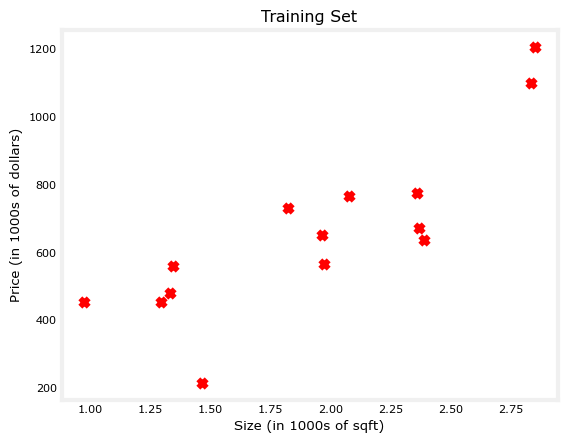

In [15]:
plt.scatter(x_train, y_train, marker='x', c='red')
plt.title("Training Set")
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (in 1000s of sqft)")
plt.show()

In [16]:
tmp_f_wb = compute_model_output(x_train, w, b)
print(tmp_f_wb)

[525.8   826.75  471.2   972.35  820.25  817.65  486.475 688.95  691.55
 726.    366.55  483.55  642.15  977.225]


Let's draw a straight blue line through the training set data using our model output to see if the parameters need any tuning. Then we can begin using the model for house price predictions based on an input house size in sqft

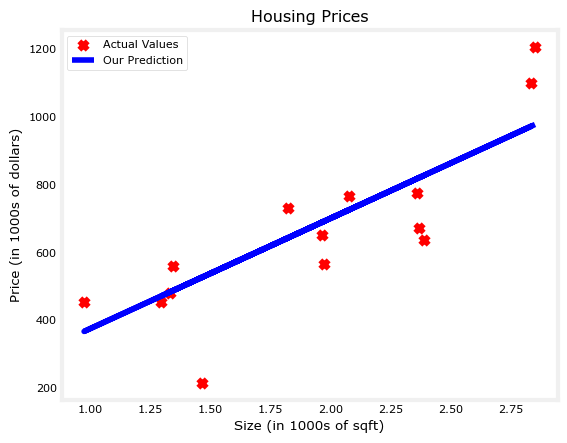

In [17]:
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')
plt.title("Housing Prices")
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (in 1000s of sqft)")
plt.legend()
plt.show()

Since the model is only using a single variable (house size in sqft), we aren't taking into account the number of bedrooms, bathrooms, lot size, or area which can have a large impact on the overall price of the house.

That being said, our imaginary client has a house size of 1750 sqft and wants to know a good price to initially list it on the market. Let's use our model and see what we can find out.

In [18]:
client_house_size = np.array([1.75])
prediction = compute_model_output(client_house_size, w, b)
print(f"A house size of {client_house_size[0]*1000} sqft can sell for approximately ${prediction[0]*1000} in the current market")

A house size of 1750.0 sqft can sell for approximately $618750.0 in the current market


## How to improve the model?

Using a cost function! I'm learning about cost functions next and that is a function that tells us how well a line is fit to the data/training set. Instead of manually plugging in different parameter values into the model function and visually seeing if it it's a good fit to the data when we plot the line. We can use a cost function and test different values for `w` and `b` to determine exactly how well a line fits the data for the provided parameter values.

### Cost Function Formula
A cost function determines how well a line fits the data. For example, the linear regression model will output predictions $\hat{y}$ for a given input and the goal is to find parameter values for `w` and `b` such that model predicitions $\hat{y}^{(i)}$ are very close to the actual output targets in the training set $y^{(i)}$ for all or mostly all training examples: ($x^{(i)}$, $y^{(i)}$)

Error (how far off the model prediction is from the target):
$$(\hat{y} - y)$$

Squared Error (for the $i^{th}$ training example):
$$(\hat{y}^{(i)} - y^{(i)})^2$$

Squared error cost function across entire training set (Total sum of squared errors) as `m` gets bigger the cost function will calculate larger sums because its summing over more training examples:
$$\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$$

Squared error cost function across entire training set (Average sum of squared errors):
$${1\over{2m}}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$$


#### Linear Regression with one variable using cost function
Linear Regression Model:
$$f_{w,b}(x)=w*x+b$$

$$\hat{y}=w*x+b$$

Parameters:
$$w,b$$

Cost Function (Squared Error):
$$J(w,b)={1\over2m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$$
$$J(w,b)={1\over2m}\sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})^2$$


Goal:
Minimize the cost function $J(w,b)$ and find the cost that is closest to zero


## How to minimize the cost function J(w,b) and get the smallest error cost?

In the next session, we learn about Gradient Descent which is an algorithm for automatically finding the values of parameters `w` and `b` that minimize the cost function $J(w,b)$